In [19]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [20]:
# Read CSV file
gdp = pd.read_csv('C:/Users/abhishek nigam/Documents/Archa Docs/Python/Python Projects/Linear Regression/GDP.csv')
gdp.head(2)

,YEAR,AUS,CHN,JPN,RUS,USA,IND
0,1850,2896.335263,796.306482,835.179422,1673.294715,2483.824349,711.922510
1,1851,3437.473345,791.661360,838.613346,1681.381986,2584.574391,710.700326


In [21]:
# Return shape of the dataset
gdp.shape

(160, 7)

In [22]:
# Return summary of the data
gdp.describe()

,YEAR,AUS,CHN,JPN,RUS,USA,IND
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,1929.500000,12031.297857,1304.928256,7318.527244,6809.009562,13774.599060,998.922174
std,46.332134,8813.287656,1285.780425,9676.488113,5579.056611,11853.761131,429.483020
min,1850.000000,2896.335263,594.575506,835.179422,1399.526261,2483.824349,682.319503
25%,1889.750000,6045.641580,717.837114,1171.213433,2212.326968,4548.528528,735.202489
50%,1929.500000,7758.512257,742.141051,2260.871165,3795.483292,8307.176731,877.705197
75%,1969.250000,16744.457667,1110.011150,10806.811140,10652.286932,20591.969463,1042.781619
max,2009.000000,35836.304230,6627.885632,30914.674710,19611.566970,43411.155420,2894.156383


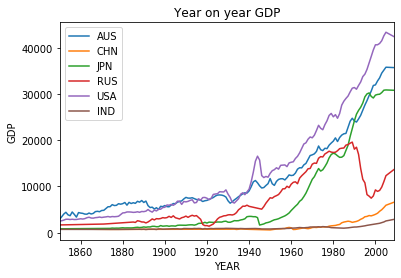

In [23]:
# Eyeballing the data using plots
gdp.plot(x='YEAR', y=['AUS', 'CHN', 'JPN', 'RUS', 'USA', 'IND'])
plt.title('Year on year GDP')  
plt.xlabel('YEAR')  
plt.ylabel('GDP')  
plt.show()

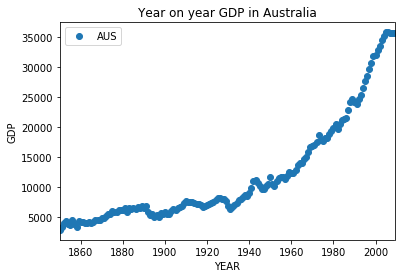

In [24]:
# Visualizing year on year variation in the GDP of Australia
gdp.plot(x='YEAR', y='AUS', style = 'o')
plt.title('Year on year GDP in Australia')  
plt.xlabel('YEAR')  
plt.ylabel('GDP')  
plt.show()

Text(0.5, 0, 'Avg GDP')

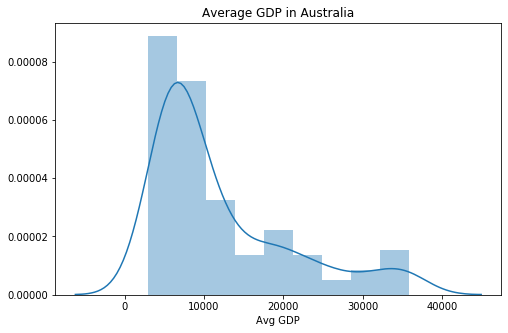

In [25]:
# Get the distribution plot to check out average GDP in Australia
plt.figure(figsize=(8,5))
seabornInstance.distplot(gdp['AUS'])
plt.title('Average GDP in Australia')   
plt.xlabel('Avg GDP')

In [26]:
#Dividing attributes and labels
X = gdp['YEAR'].values.reshape(-1,1)  # reshape(-1,1) represents single feature data. -1 -> unkown rows and 1 -> 1 column
Y = gdp['AUS'].values.reshape(-1,1)

In [27]:
# Spliting data into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [28]:
# Applying linear regression algorithm-
regressor = LinearRegression()  
regressor.fit(X_train, Y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
# Return the value of intercept
print(regressor.intercept_)

# Return the value of slope
print(regressor.coef_)
#This means GDP chsnges every year by this rate-> 170.38

[-316500.13995459]
[[170.38804817]]


In [30]:
# Now that I have trained my algorithm it time to make prediction;
Y_pred = regressor.predict(X_test)

In [31]:
# Compare actual vs predicted GDP
Aus_gdp = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': Y_pred.flatten()})
Aus_gdp

,Actual,Predicted
0,12371.267040,17460.434454
1,12908.657520,17801.210551
2,25420.185390,23083.240044
3,3950.747948,-89.534507
4,5522.834734,6214.823275
5,10591.026210,15926.942021
6,17594.702860,19505.091032
7,7153.581475,9963.360335
8,7798.840976,13200.733250
9,8089.207752,13371.121298


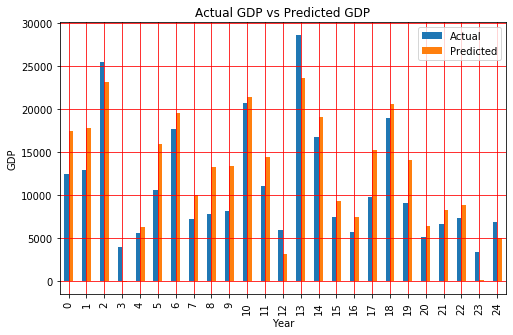

In [32]:
# Visual comparison of actual and predicted values
Aus_gdp_top25 = Aus_gdp.head(25)
Aus_gdp_top25.plot(kind='bar',figsize=(8,5))
plt.grid(which='major', linestyle='-', linewidth='0.8', color='red')
plt.grid(which='minor', linestyle=':', linewidth='0.8', color='orange')
plt.title('Actual GDP vs Predicted GDP')   
plt.xlabel('Year')
plt.ylabel('GDP')        
plt.show()

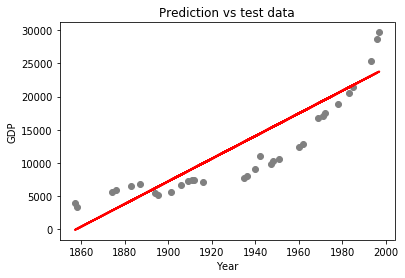

In [33]:
# Lets make a scatter plot 
plt.scatter(X_test, Y_test,  color='gray')
plt.plot(X_test, Y_pred, color='red', linewidth=2)
plt.title('Prediction vs test data')   
plt.xlabel('Year')
plt.ylabel('GDP')
plt.show()

# Since we are getting a staright line means our algorithm is working correctly.

In [34]:
# Final step is to evaluate the performance of the algorithm using below evaluation metrices on test data.

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 3044.4458864023295
Mean Squared Error: 12068598.210886478
Root Mean Squared Error: 3473.988804081913
